In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyspark
!apt install openjdk-8-jdk-headless -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 57.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=002fc8a4098f33a145405d14643c25c729945906be0659ee83113ff29cd49487
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upg

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [4]:
import pyspark
from pyspark.sql import *
import pyspark.sql.functions as fn
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf

In [5]:
sc = pyspark.SparkContext()
spark = SparkSession.builder.getOrCreate()

In [ ]:
# 아래 코드는 실행하는데 한 4분쯤 걸림

In [ ]:
df_oct = spark.read.csv("/content/drive/MyDrive/2022 빅데이터처리및응용 팀프로젝트/2019-Oct.csv", inferSchema=True, header=True)

In [ ]:
df_oct.show()

+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 00:00:00|      view|  44600062|2103807459595387724|                null|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 00:00:00|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-10-01 00:00:01|      view|  17200506|2053013559792632471|furniture.living_...|    null|  543.1|519107250|566511c2-e2e3-422...|
|2019-10-01 00:00:01|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 00:00:04|      view|   1004237|2053013555631882655|electr

In [ ]:
df_oct.count()

42448764

In [ ]:
df_oct.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [ ]:
# 아래 코드는 실행하는데 약 6분 쯤 소요됨

In [ ]:
df_nov = spark.read.csv("/content/drive/MyDrive/2022 빅데이터처리및응용 팀프로젝트/2019-Nov.csv", inferSchema=True, header=True)

In [ ]:
df_nov.show()

+-------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand| price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|2019-11-01 00:00:00|      view|   1003461|2053013555631882655|electronics.smart...|  xiaomi|489.07|520088904|4d3b30da-a5e4-49d...|
|2019-11-01 00:00:00|      view|   5000088|2053013566100866035|appliances.sewing...|  janome|293.65|530496790|8e5f4f83-366c-4f7...|
|2019-11-01 00:00:01|      view|  17302664|2053013553853497655|                null|   creed| 28.31|561587266|755422e7-9040-477...|
|2019-11-01 00:00:01|      view|   3601530|2053013563810775923|appliances.kitche...|      lg|712.87|518085591|3bfb58cd-7892-48c...|
|2019-11-01 00:00:01|      view|   1004775|2053013555631882655|electronics.s

In [ ]:
df_nov.count()

67501979

In [ ]:
df_nov.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [ ]:
df = df_oct.union(df_nov)

df.show()

+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 00:00:00|      view|  44600062|2103807459595387724|                null|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 00:00:00|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-10-01 00:00:01|      view|  17200506|2053013559792632471|furniture.living_...|    null|  543.1|519107250|566511c2-e2e3-422...|
|2019-10-01 00:00:01|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 00:00:04|      view|   1004237|2053013555631882655|electr

In [ ]:
df.count()

109950743

In [ ]:
df.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [ ]:
df.select("user_id").show()

+---------+
|  user_id|
+---------+
|541312140|
|554748717|
|519107250|
|550050854|
|535871217|
|512742880|
|555447699|
|550978835|
|520571932|
|537918940|
|555158050|
|530282093|
|555444559|
|541312140|
|555446365|
|513642368|
|537192226|
|519528062|
|550050854|
|535871217|
+---------+
only showing top 20 rows



In [ ]:
# 아래 코드는 실행시 약 1분 정도 걸림

In [ ]:
user_id = 541312140

df.filter(df.user_id==user_id).show()

+-------------------+----------+----------+-------------------+-------------+--------+------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|category_code|   brand| price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+-------------+--------+------+---------+--------------------+
|2019-10-01 00:00:00|      view|  44600062|2103807459595387724|         null|shiseido| 35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 00:00:15|      view|  44600062|2103807459595387724|         null|shiseido| 35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-02 14:30:46|      view|  17302761|2053013553853497655|         null|    null|  73.4|541312140|bda25b1a-8844-40e...|
|2019-10-05 14:10:39|      view|  17700454|2053013558861496931|         null|  lumene|  19.0|541312140|58c59c3e-da37-4a5...|
|2019-10-05 14:11:38|      view|  17700020|2053013558861496931|         null|   payot| 83.58|541312140|23fb14a1-9fd3-4e3...|


In [ ]:
# 아래 코드는 실행시 약 3분쯤 걸림

In [ ]:
from pyspark.sql.functions import count, udf, sum
df_1 = df.groupby("user_id").agg(count("event_type").alias("event 수"))
df_1.show()

+---------+--------+
|  user_id|event 수|
+---------+--------+
|555447570|      50|
|524493281|      72|
|543091275|       8|
|509481306|       1|
|513992906|       2|
|539234006|      10|
|518093424|      51|
|552509284|     177|
|513431118|     150|
|515959651|       2|
|545114128|      13|
|555464935|       4|
|517597867|     143|
|546839974|      67|
|530039999|      22|
|529847028|      92|
|553649979|      28|
|515687124|      28|
|515772044|      43|
|516400912|      11|
+---------+--------+
only showing top 20 rows



In [ ]:
# 아래 코드는 실행 시 3분쯤 소요됨

In [ ]:
df_purchase = df.filter(df.event_type == "purchase")
df_2 = df_purchase.groupby("user_id").agg(sum("price").alias("총합 price"))
df_2.show()

+---------+-----------------+
|  user_id|       총합 price|
+---------+-----------------+
|546839974|          1371.48|
|555468492|           167.21|
|518619616|611.0799999999999|
|537163771|          1911.41|
|540805815|          1491.91|
|555483609|          1056.57|
|553923283|812.3900000000001|
|542465551|            72.07|
|552269114|           410.85|
|518685353|           594.58|
|551388041|           9546.5|
|514264972|35281.10999999998|
|543399383|           560.69|
|524340312|           542.21|
|525960487|           207.93|
|544378707|           185.71|
|554107795|           388.02|
|552286822|            90.61|
|531612333|          1352.15|
|546837996|           278.24|
+---------+-----------------+
only showing top 20 rows



In [ ]:
df_1.count()

5316649

In [ ]:
df_anova = df_1.join(df_2, df_1.user_id == df_2.user_id, "leftouter")
df_anova.show()

+---------+-------+---------+----------+
|  user_id|view 수|  user_id|총합 price|
+---------+-------+---------+----------+
|509481306|      1|     null|      null|
|513431118|    150|     null|      null|
|513992906|      2|     null|      null|
|515687124|     28|     null|      null|
|515772044|     43|     null|      null|
|515959651|      2|     null|      null|
|516400912|     11|     null|      null|
|517597867|    143|517597867|     76.62|
|518093424|     51|518093424|    438.72|
|524493281|     72|524493281|    149.27|
|526715786|      4|     null|      null|
|529847028|     92|529847028|    498.68|
|530039999|     22|     null|      null|
|539234006|     10|539234006|     13.48|
|543091275|      8|     null|      null|
|545114128|     13|     null|      null|
|546839974|     67|546839974|   1371.48|
|552509284|    177|552509284|     87.64|
|553649979|     28|553649979|     50.19|
|555447570|     50|     null|      null|
+---------+-------+---------+----------+
only showing top 20

In [ ]:
df_anova_2 = df_1.join(df_2, df_1.user_id == df_2.user_id, "leftouter").drop("user_id")
df_anova_2.show()

+--------+----------+
|event 수|총합 price|
+--------+----------+
|       1|      null|
|     150|      null|
|       2|      null|
|      28|      null|
|      43|      null|
|       2|      null|
|      11|      null|
|     143|     76.62|
|      51|    438.72|
|      72|    149.27|
|       4|      null|
|      92|    498.68|
|      22|      null|
|      10|     13.48|
|       8|      null|
|      13|      null|
|      67|   1371.48|
|     177|     87.64|
|      28|     50.19|
|      50|      null|
+--------+----------+
only showing top 20 rows



In [ ]:
# null을 0으로 채우기

df_anova = df_anova_2.fillna(0, subset=['총합 price'])
df_anova.show()

+--------+----------+
|event 수|총합 price|
+--------+----------+
|       1|       0.0|
|     150|       0.0|
|       2|       0.0|
|      28|       0.0|
|      43|       0.0|
|       2|       0.0|
|      11|       0.0|
|     143|     76.62|
|      51|    438.72|
|      72|    149.27|
|       4|       0.0|
|      92|    498.68|
|      22|       0.0|
|      10|     13.48|
|       8|       0.0|
|      13|       0.0|
|      67|   1371.48|
|     177|     87.64|
|      28|     50.19|
|      50|       0.0|
+--------+----------+
only showing top 20 rows



In [ ]:
# event 수의 분포 출력
import pandas as pd
x = df_anova.select('event 수').toPandas()  


In [ ]:
x.describe()

,event 수
count,5.316649e+06
mean,2.068046e+01
std,5.391672e+01
min,1.000000e+00
25%,2.000000e+00
50%,5.000000e+00
75%,1.800000e+01
max,2.292900e+04


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


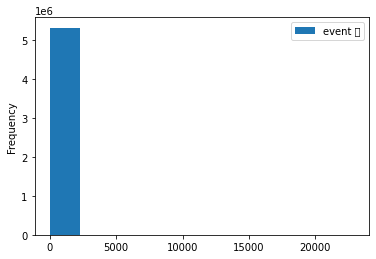

In [ ]:
x.plot(kind='hist')

In [ ]:
# 사분위 수에 따라 열의 값을 결정하는 udf 작성

def filtering(x):
    if x >= 18: return "high"
    elif x >= 5: return "intermediate"
    elif x >= 2: return "low" 
    else: return "lowest"

udf_filtering = udf(filtering)

In [ ]:
# df_anova에 있는 "event 수" 열을 각 사분위수 범위에 따라 나눠줌

from pyspark.sql.functions import col

df_anova_filtered = df_anova.select(
    udf_filtering(col("event 수")).alias("event 수"),
    col("총합 price")
)

In [ ]:
df_anova_filtered.show()

+------------+----------+
|    event 수|총합 price|
+------------+----------+
|      lowest|       0.0|
|        high|       0.0|
|         low|       0.0|
|        high|       0.0|
|        high|       0.0|
|         low|       0.0|
|intermediate|       0.0|
|        high|     76.62|
|        high|    438.72|
|        high|    149.27|
|         low|       0.0|
|        high|    498.68|
|        high|       0.0|
|intermediate|     13.48|
|intermediate|       0.0|
|intermediate|       0.0|
|        high|   1371.48|
|        high|     87.64|
|        high|     50.19|
|        high|       0.0|
+------------+----------+
only showing top 20 rows



In [ ]:
df_anova_filtered.count()

5316649

In [ ]:
from pyspark.sql.functions import lit, avg, count, udf, struct, sum
from pyspark.sql.types import DoubleType

def one_way_anova(df, categorical_var, continuous_var):
    global_avg = df.select(avg(continuous_var)).take(1)[0][0]

    avg_in_groups = df.groupby(categorical_var).agg(avg(continuous_var).alias("Group_avg"),
                                                    count("*").alias("N_of_records_per_group"))
    avg_in_groups = avg_in_groups.withColumn("Global_avg",
                                            lit(global_avg))

    udf_between_ss = udf(lambda x: x[0] * (x[1] - x[2]) ** 2,
                        DoubleType())
    between_df = avg_in_groups.withColumn("squared_diff",
                                        udf_between_ss(struct('N_of_records_per_group',
                                                                'Global_avg',
                                                                'Group_avg')))
    ssbg = between_df.select(sum('squared_diff')).take(1)[0][0]

    within_df_joined = avg_in_groups \
        .join(df,
            df[categorical_var] == avg_in_groups[categorical_var]) \
        .drop(avg_in_groups[categorical_var])

    udf_within_ss = udf(lambda x: (x[0] - x[1]) ** 2, DoubleType())
    within_df_joined = within_df_joined.withColumn("squared_diff",
                                                udf_within_ss(struct(continuous_var,
                                                                        'Group_avg')))
    sswg = within_df_joined \
        .groupby(categorical_var) \
        .agg(sum("squared_diff").alias("sum_of_squares_within_gropus")) \
        .select(sum('sum_of_squares_within_gropus')).take(1)[0][0]
    m = df.groupby(categorical_var) \
        .agg(count("*")) \
        .count()  
    n = df.count()  
    df1 = m - 1
    df2 = n - m
    f_statistic = (ssbg / df1) / (sswg / df2)
    return sswg, ssbg, f_statistic, df1, df2

In [ ]:
# 귀무 가설: 네 개의 모집단의 평균 구매 가격은 유의한 차이가 없다.
# 대립 가설: 적어도 한 쌍의 모평균에 유의한 차이가 있다.

In [ ]:
# 아래 코드는 실행 시 약 32분 소요됨

In [ ]:
one_way_anova(df_anova_filtered, "event 수", "총합 price")

(3835388505728.226, 80394098144.74055, 37147.638741366434, 3, 5316645)

In [ ]:
# df_1은 집단의 개수 - 1 = 4-1=3이고,
# df_2는 유저의 개수 - 집단의 개수 = 5316649-4=5316645이다.

In [ ]:
import scipy.stats

f = 37147.638741366434
df1 = 3
df2 = 5316645
p = 1-scipy.stats.f.cdf(f, df1, df2)

print("p-value =", p)

p-value = 1.1102230246251565e-16


In [ ]:
# 따라서 유의수준 0.001에서 귀무가설을 기각한다.(***) 
# 즉 4개의 모집단의 평균 구매 가격에 유의한 차이가 없다고 말할 통계적 근거는 없다.